In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 케라스 어플리케이션 모델 불러오기 https://keras.io/ko/applications/
# from tensorflow.keras.applications import VGG16 
# transfer_model=VGG16(input_shape=(150, 150, 3),#classifier_activation='None'
#                      include_top=False)
# transfer_model.trainable = False
# transfer_model.summary()

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255, #정규화
                   horizontal_flip=True, #수평으로 뒤집기
                   width_shift_range=0.1, #수평이동
                   height_shift_range=0.1, #수직이동
                   fill_mode='nearest') #빈공간 채우는 방법


train_generator=train_datagen.flow_from_directory('./generator/train/',
                                                target_size=(150,150),
                                                batch_size=5,
                                                class_mode='binary')

test_datagen=ImageDataGenerator(rescale=1./255, #정규화
                   horizontal_flip=True, #수평으로 뒤집기
                   width_shift_range=0.1, #수평이동
                   height_shift_range=0.1, #수직이동
                   fill_mode='nearest') #빈공간 채우는 방법


test_generator=train_datagen.flow_from_directory('./generator/test/',
                                                target_size=(150,150),
                                                batch_size=5,
                                                class_mode='binary')


Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [3]:
transfer_model=VGG16(input_shape=(150, 150, 3),#classifier_activation='None'
                     include_top=False)
transfer_model.trainable = False
transfer_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [4]:
model=Sequential()
model.add(transfer_model)
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5)) #랜덤하게 이미지같은경우 공백이많아서
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15,239,105
Trainable params: 524,417
Non-trainable params: 14,714,688
_________________________________________________________________


In [5]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.002), metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0)

history = model.fit(train_generator,epochs=20,
                    validation_data=test_generator,
                    validation_steps=10,
                    callbacks=[early_stopping])

Epoch 1/20
32/32 [==============================] - 10s 283ms/step - loss: 0.9716 - accuracy: 0.5500 - val_loss: 0.6078 - val_accuracy: 0.5800
Epoch 2/20
32/32 [==============================] - 9s 283ms/step - loss: 0.5532 - accuracy: 0.6500 - val_loss: 0.4754 - val_accuracy: 0.9000
Epoch 3/20
32/32 [==============================] - 9s 277ms/step - loss: 0.6163 - accuracy: 0.6875 - val_loss: 0.5421 - val_accuracy: 0.8400
Epoch 4/20
32/32 [==============================] - 9s 286ms/step - loss: 0.4709 - accuracy: 0.7312 - val_loss: 0.5148 - val_accuracy: 0.7200
Epoch 5/20
32/32 [==============================] - 9s 275ms/step - loss: 0.4723 - accuracy: 0.7250 - val_loss: 0.3356 - val_accuracy: 0.9000
Epoch 6/20
32/32 [==============================] - 9s 276ms/step - loss: 0.3987 - accuracy: 0.7500 - val_loss: 0.3598 - val_accuracy: 0.8400
Epoch 7/20
32/32 [==============================] - 10s 320ms/step - loss: 0.4165 - accuracy: 0.7937 - val_loss: 0.2305 - val_accuracy: 0.9600
Epoc

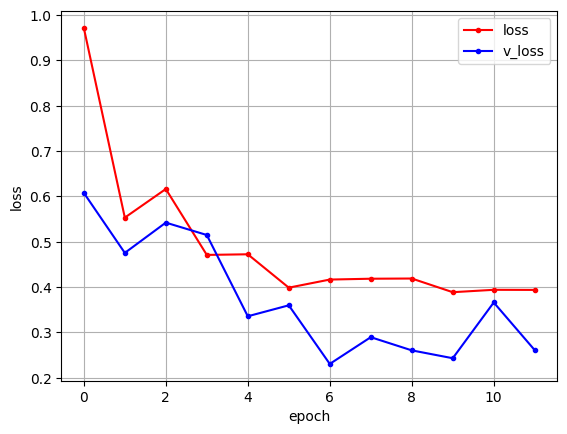

In [6]:
y_vloss=history.history['val_loss']
y_loss=history.history['loss']
x_len=np.arange(len(y_vloss))
plt.plot(x_len,y_loss,label='loss',marker='.',c='red')
plt.plot(x_len,y_vloss,label='v_loss',marker='.',c='blue')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()